#Project : Data Wrangling of OSM street map .

I have choosen Ahemdabad City for Data Wrangling. It is a city in the state of Gujrat, which is one of the states in India.

I have both Mango DB and sqlite for this purpose.Using the OSM information I was able to trace the city of Ahemdabad on the 
world map.

Problems with the data :
1) The Data had wrongly spelled words and many abbrevations used which had to be replaced . Hence , Rd. Ft. , St. etc 
with Road , Feet , Saint and so on.
2) There many names of the Roads which have spelling mistakes or shortcuts, for example ,Chimanlal Girdharlal Road , is printed 
as CG or C.G. Road 
3) S.H and N.H means State Highway and National Highway.


Above issues were solved using using different regular expressions .

I ported the data to CSVs first and then converted it to Database file , using SQL commands it was easy to extract information 
like number of tourist places, religion places and railway stations


References :
1) Folium plot : https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/
http://pythonhow.com/web-mapping-with-python-and-folium/

2) For Basemap plot : https://basemaptutorial.readthedocs.io/en/latest/

3) SQLite : Udacity Forums and quizes 

3) Mango DB code : Udacity Forums and quizes.

import xml.etree.cElementTree as ET
from collections import defaultdict
import re
import pprint

osm_file = "C:\Users\KACHI\Desktop\OSM_project\\ahmedabad_india.osm"

for _, elem in ET.iterparse(osm_file):
    print(elem.tag,elem.attrib)
    
    
## Running the code above gave the lattitude and longitude of the city which are :
('bounds', {'minlat': '22.855', 'maxlon': '72.787', 'minlon': '72.364', 'maxlat': '23.201'})

These are usedful to plot the location of city on the world map as shown in below cell.


C:\Users\KACHI\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
C:\Users\KACHI\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\KACHI\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


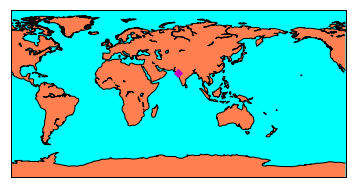

In [1]:
#With given information in OSM file plotting Ahmedabad on map, I plotted the city as seen on the map , it at the 
#west side of India, plotted using a magenta plot


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='cyl', 
              lat_0=22, lon_0=72)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


# x=longitude, y = lattitude
x, y = map(72, 22)

map.plot(x, y, marker='D',color='m')

plt.show()



In [2]:
import folium
# Setup the coordinates of the map center and the zoom option.
map_osm = folium.Map(location=[22.900, 72.800], zoom_start=8)
# Add labels with coordinates.
folium.LatLngPopup().add_to(map_osm)
# Setup the coordinates of the map area.
points=[[21.900, 70.900], [21.900, 73.00], [23.500, 73.00], [23.500, 70.900], [21.900, 70.900]]
# Setup the border line with options.
folium.PolyLine(points, color="red", weight=5, opacity=0.3).add_to(map_osm)
# Display the map.
map_osm

In [9]:
# Below is the Data Cleaning of Street names and # Abbrevations used for the street names are replaced :


import xml.etree.cElementTree as ET
from collections import defaultdict
import re
import pprint
import codecs
import csv
import schema
import cerberus


SCHEMA=schema.schema
osm_file = "C:\Users\KACHI\Desktop\OSM_project\\ahmedabad_india.osm"

expected = ["Saint","Feet","Road","Society", "Number","Near",
            "Opposite","Chimanlal Girdharlal Road","Sarkhej Gandhinagar"]

street_type_re = re.compile(r'\b\S+[a-zA-Z\.\,]', re.IGNORECASE)
street_types = defaultdict(set)

mapping = { "St.": "Saint",
            "no.": "Number",
            "soc.":"Society",
            "Socity,":"Society",
            "Sosciety":"Society",
            "Rd,":"Road",
            "Roads":"Road",
            "rasta":"Road",
            "chokdi":"Road",
            "Nr.":"Near",
            "nr":"Near",
            "Opp":"Opposite",
            "Ft.":"Feet",
           "CG": "Chimanlal Girdharlal ",
            "C.G": "Chimanlal Girdharlal ",
            "S.G": "Sarkhej Gandhinagar ",
            "KH" : "KH-0",
            "NH":"National Highway",
            "SH":"State Highway"
            }   



mapping_keys = mapping.keys()

value =[]
def audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        #print(street_name)
        street_type = m.group()
        if street_type not in expected:
            street_types[street_type].add(street_name)
            if street_type in mapping_keys:
                update_tags(street_type,street_name)
            return(street_types)
            
def is_street_name(tag):
    return (tag.attrib['k'] == "addr:street")

value = []
def update_tags(street_type,street_name):
    
    if street_type in mapping_keys:
        value.append(re.sub(street_type,mapping[street_type],street_name))
        return value


street_types = defaultdict(set)

for event, elem in ET.iterparse(osm_file):
    if elem.tag == "node" or elem.tag == "way":
        for tag in elem.iter("tag"):
            if is_street_name(tag):
                audit_street_type(street_types, tag.attrib['v'])
               

In [11]:
# Below are the replacements done
print("Replacements are:")
for i in value:
    print i

Replacements are:
132 Feet Ring Road
132 Feet Ring Road
Near Chandan Party Plot
Near Chandan Party Plot
100 Feet Road
Saint Xavier's College Road
Saint Xavier's College Road
100 Feet Road
100 Feet Road
State Highway-41
132 Feet Ring Road
100 Feet Road
National Highway8
National Highway8
132 Feet Ring Road
100 Feet Road
100 Feet Road
100 Feet Road
National Highway8
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
Chimanlal Girdharlal  Road
100 Feet Road
100 Feet Road
132 Feet Ring Road


In [16]:
# The information in OSM file is converted to CSV files , which will be used to create the Database


NODES_PATH = "nodes.csv"
NODE_TAGS_PATH = "nodes_tags.csv"
WAYS_PATH = "ways.csv"
WAY_NODES_PATH = "ways_nodes.csv"
WAY_TAGS_PATH = "ways_tags.csv"

LOWER_COLON = re.compile(r'^([a-z]|_)+:([a-z]|_)+')
# example : {'k': 'addr:city', 'v': 'Chicago'}
PROBLEMCHARS = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')
#eliminates =+&<>;'"?%#$@,. tab(\t), carraige return(\r) and new line(\n) 


# Make sure the fields order in the csvs matches the column order in the sql table schema
NODE_FIELDS = ['id', 'lat', 'lon', 'user', 'uid', 'version', 'changeset', 'timestamp']
NODE_TAGS_FIELDS = ['id', 'key', 'value', 'type']
WAY_FIELDS = ['id', 'user', 'uid', 'version', 'changeset', 'timestamp']
WAY_TAGS_FIELDS = ['id', 'key', 'value', 'type']
WAY_NODES_FIELDS = ['id', 'node_id', 'position']

def is_street_name(tag):
    return (tag.attrib['k'] == "addr:street")


def update_tag(attrib):
    #print(attrib)
    m = street_type_re.search(attrib)
    if m:
        street_type = m.group()
        if street_type not in expected:
            if street_type in mapping_keys:
                return(re.sub(street_type,mapping[street_type],attrib))


def shape_element(element, node_attr_fields=NODE_FIELDS, way_attr_fields=WAY_FIELDS,
                  problem_chars=PROBLEMCHARS, default_tag_type='regular'):
    """Clean and shape node or way XML element to Python dict"""
        
    node_attribs = {}
    way_attribs = {}
    way_nodes = []
    tags = []  # Handle secondary tags the same way for both node and way elements
    node_tags = {}
    
    if element.tag == 'node':
        for k in element.attrib:
            if k in NODE_FIELDS:
                node_attribs[k]=element.attrib[k]
        for y in element:
            if y.tag=='tag':
                if LOWER_COLON.match(y.attrib['k']):
                    #print(y.attrib)
                    node_tags['id']=element.attrib['id']
                    #print(element.attrib['id'])
                    node_tags['key']=y.attrib['k'].split(":",1)[1]
                    #print(y.attrib['k'])
                    #print(y.attrib['k'].split(":",1)[1])
                    node_tags['type']=y.attrib['k'].split(":",1)[0]
                    #print(y.attrib['k'].split(":",1)[0])
                    if y.attrib['k']=='addr:street':
                        if(update_tag(y.attrib['v'])):
                            node_tags['value'] = update_tag(y.attrib['v'])
                        else:
                            node_tags["value"]=y.attrib["v"]
                    else:
                        node_tags["value"]=y.attrib["v"]
                    #print(node_tags)
                    
                else:
                    node_tags["type"]='regular'
                    node_tags["key"]=y.attrib["k"]
                    node_tags["id"]=element.attrib["id"]
                    node_tags["value"]=y.attrib["v"]
                tags.append(node_tags) 
        return {'node': node_attribs, 'node_tags': tags}  
    elif element.tag == 'way':
        for x in element.attrib:
            if x in WAY_FIELDS:
                way_attribs[x]=element.attrib[x]
        count=0
        for l in element.iter("nd"):
            way_nodes.append({'id':element.attrib['id'],'node_id':l.attrib['ref'],'position':count})
            count+=1
        for y in element:
            if y.tag=='tag':
                if PROBLEMCHARS.search(y.attrib["k"]):
                    continue
                elif LOWER_COLON.match(y.attrib['k']):
                    node_tags['id']=element.attrib['id']
                    node_tags['key']=y.attrib['k'].split(":",1)[1]
                    node_tags['type']=y.attrib['k'].split(":",1)[0]
                    if y.attrib['k']=='addr:street':
                        if(update_tag(y.attrib['v'])):
                                node_tags['value'] = update_tag(y.attrib['v'])
                        else:
                            node_tags["value"]=y.attrib["v"]
                    else:
                        node_tags["value"]=y.attrib["v"]
                else:
                    node_tags["type"]='regular'
                    node_tags["key"]=y.attrib["k"]
                    node_tags["id"]=element.attrib["id"]
                    node_tags["value"]=y.attrib["v"]
                    
                tags.append(node_tags)
                
        return {'way': way_attribs, 'way_nodes': way_nodes, 'way_tags': tags}        

                            
# ================================================== #
#               Helper Functions                     #
# ================================================== #
def get_element(osm_file, tags=('node', 'way', 'relation')):
    """Yield element if it is the right type of tag"""

    context = ET.iterparse(osm_file, events=('start', 'end'))
    _, root = next(context)
    for event, elem in context:
        if event == 'end' and elem.tag in tags:
            yield elem
            root.clear()


def validate_element(element, validator, schema=SCHEMA):
    """Raise ValidationError if element does not match schema"""
    if validator.validate(element, schema) is not True:
        field, errors = next(validator.errors.iteritems())
        message_string = "\nElement of type '{0}' has the following errors:\n{1}"
        error_string = pprint.pformat(errors)
        
        raise Exception(message_string.format(field, error_string))


class UnicodeDictWriter(csv.DictWriter, object):
    """Extend csv.DictWriter to handle Unicode input"""

    def writerow(self, row):
        super(UnicodeDictWriter, self).writerow({
            k: (v.encode('utf-8') if isinstance(v, unicode) else v) for k, v in row.iteritems()
        })

    def writerows(self, rows):
        for row in rows:
            self.writerow(row)


# ================================================== #
#               Main Function                        #
# ================================================== #
def process_map(osmfile, validate):
    """Iteratively process each XML element and write to csv(s)"""

    with codecs.open(NODES_PATH, 'wb') as nodes_file, \
         codecs.open(NODE_TAGS_PATH, 'wb') as nodes_tags_file, \
         codecs.open(WAYS_PATH, 'wb') as ways_file, \
         codecs.open(WAY_NODES_PATH, 'wb') as way_nodes_file, \
         codecs.open(WAY_TAGS_PATH, 'wb') as way_tags_file:

        nodes_writer = UnicodeDictWriter(nodes_file, NODE_FIELDS)
        node_tags_writer = UnicodeDictWriter(nodes_tags_file, NODE_TAGS_FIELDS)
        ways_writer = UnicodeDictWriter(ways_file, WAY_FIELDS)
        way_nodes_writer = UnicodeDictWriter(way_nodes_file, WAY_NODES_FIELDS)
        way_tags_writer = UnicodeDictWriter(way_tags_file, WAY_TAGS_FIELDS)

        nodes_writer.writeheader()
        node_tags_writer.writeheader()
        ways_writer.writeheader()
        way_nodes_writer.writeheader()
        way_tags_writer.writeheader()

        validator = cerberus.Validator()

        for element in get_element(osmfile, tags=('node', 'way')):
            
            el = shape_element(element)
            if el:
                if validate is True:
                    validate_element(el, validator)

                if element.tag == 'node':
                    nodes_writer.writerow(el['node'])
                    node_tags_writer.writerows(el['node_tags'])
                elif element.tag == 'way':
                    ways_writer.writerow(el['way'])
                    way_nodes_writer.writerows(el['way_nodes'])
                    way_tags_writer.writerows(el['way_tags'])


if __name__ == '__main__':
    # Note: Validation is ~ 10X slower. For the project consider using a small
    # sample of the map when validating.
    process_map(osmfile, validate=False)


In [17]:
# Converting the information from CSV file to SQL data base


import sqlite3
import csv
from pprint import pprint

sqlite_file = 'ahmbad.db'

conn = sqlite3.connect(sqlite_file)

cur = conn.cursor()


##CREATING TABLE NODES_TAGS

#NODE_TAGS_PATH = "nodes_tags.csv"
#NODE_TAGS_FIELDS = ['id', 'key', 'value', 'type']

cur.execute('''DROP TABLE IF EXISTS nodes_tags''')

cur.execute('''
    CREATE TABLE nodes_tags(id INTEGER, key TEXT, value TEXT,type TEXT)
''')

conn.commit()

with open('nodes_tags.csv','rb') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['id'], i['key'],i['value'].decode("utf-8"), i['type']) for i in dr]
    
cur.executemany("INSERT INTO nodes_tags(id, key, value,type) VALUES (?, ?, ?, ?);", to_db)
# commit the changes
conn.commit()



##CREATING THE TABLE NODE:

#NODE_FIELDS = ['id', 'lat', 'lon', 'user', 'uid', 'version', 'changeset', 'timestamp']
#NODES_PATH = "nodes.csv"


cur.execute('''DROP TABLE IF EXISTS nodes''')

cur.execute('''
    CREATE TABLE nodes(id INTEGER, lat INTEGER , lon INTEGER ,user TEXT,uid INTEGER, version INTEGER, changeset INTEGER , 
     timestamp TEXT   )
''')

conn.commit()

with open('nodes.csv','rb') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['id'], i['lat'],i['lon'],i['user'].decode("utf-8"), i['uid'],i['version'],i['changeset'],i['timestamp']) for i in dr]
    
cur.executemany("INSERT INTO nodes(id, lat, lon, user, uid, version, changeset, timestamp) VALUES (?, ?, ?, ?, ?, ?, ?, ? );", to_db)
# commit the changes
conn.commit()



##CREATING WAYS_NODES TABLES:

#WAY_NODES_FIELDS = ['id', 'node_id', 'position']
#WAY_TAGS_PATH = "ways_tags.csv


cur.execute('''DROP TABLE IF EXISTS ways_nodes''')

cur.execute('''
    CREATE TABLE ways_nodes(id INTEGER, node_id INTEGER, position INTEGER)
''')

conn.commit()

with open('ways_nodes.csv','rb') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['id'],i['node_id'].decode("utf-8"), i['position']) for i in dr]
    
cur.executemany("INSERT INTO ways_nodes(id, node_id, position) VALUES (?, ?, ?);", to_db)
# commit the changes
conn.commit()



##CREATING WAYS TABLE:

#WAYS_PATH = "ways.csv"
#WAY_FIELDS = ['id', 'user', 'uid', 'version', 'changeset', 'timestamp']

cur.execute('''DROP TABLE IF EXISTS ways''')

cur.execute('''
    CREATE TABLE ways(id INTEGER,user TEXT,uid INTEGER, version INTEGER, changeset INTEGER , 
     timestamp TEXT   )
''')

conn.commit()

with open('ways.csv','rb') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['id'],i['user'].decode("utf-8"), i['uid'],i['version'],i['changeset'],i['timestamp']) for i in dr]
    
cur.executemany("INSERT INTO ways (id, user, uid, version, changeset, timestamp) VALUES (?, ?, ?, ?, ?,? );", to_db)
# commit the changes
conn.commit()


##CREATING TABLE WAYS_TAGS

#NODE_TAGS_PATH = "ways_tags.csv"
#NODE_TAGS_FIELDS = ['id', 'key', 'value', 'type']

cur.execute('''DROP TABLE IF EXISTS ways_tags''')

cur.execute('''
    CREATE TABLE ways_tags(id INTEGER, key TEXT, value TEXT,type TEXT)
''')

conn.commit()

with open('ways_tags.csv','rb') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['id'], i['key'],i['value'].decode("utf-8"), i['type']) for i in dr]
    
cur.executemany("INSERT INTO ways_tags(id, key, value,type) VALUES (?, ?, ?, ?);", to_db)
# commit the changes
conn.commit()



# Finding number of Railway Stations. 

QUERY = ( '''SELECT DISTINCT COUNT(id) 
            FROM nodes_tags
            WHERE value = 'station' ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
import pandas as pd    
df = pd.DataFrame(all_rows)
print("Number of stations are")
pprint(df)

# Finding number of tourist places 
QUERY = ( '''SELECT DISTINCT COUNT(id) 
            FROM nodes_tags
            WHERE key = 'tourism' AND value = 'attraction'  ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
import pandas as pd    
df = pd.DataFrame(all_rows)
print("Number of Tourist places are")
pprint(df)


# Finding number of religion places 
QUERY = ( '''SELECT DISTINCT COUNT(id) 
            FROM nodes_tags
            WHERE key = 'religion' AND value = 'hindu'  ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
import pandas as pd    
df = pd.DataFrame(all_rows)
print("Number of Religion places are")
pprint(df)


# Counting number of amenities:

QUERY = ( '''SELECT value,count(*)as num from (select value,key from nodes_tags  UNION ALL select value,key from ways_tags)
        where key='amenity'
        group by value
        order by num desc  ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
import pandas as pd    
df = pd.DataFrame(all_rows)
print("Number of Amenities are")
pprint(df)


# Classification and number of amenities:

QUERY = ( '''SELECT value,count(*)as num from (select value,key from nodes_tags  UNION ALL select value,key from ways_tags)
        where key='amenity' AND value IN ('school','hospital','college','restaurant','fuel','place_of_worship','bus_station',
        'parking', 'marketplace','bank','university','fire_station' , 'library', 'toilets' , 'drinking_water' ,'atm' , 'pharmacy',
        'post_office' ,'public_building', 'taxi' , 'bench' , 'fountain', 'post_box' , 'car_wash' , 'community_centre' , 'plaza',
        'swimming_pool', 'townhall' , 'arts_centre' , 'motorcycle_parking' )
          ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
print("Number of classified Amenities as Public are:")
for i , j in all_rows:
    print j

QUERY = ( '''SELECT value,count(*)as num from (select value,key from nodes_tags  UNION ALL select value,key from ways_tags)
        where key='amenity' AND value IN ('prison','police','courthouse' )
          ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
print("Number of classified Amenities as Goverment are:")
for i , j in all_rows:
    print j

QUERY = ( '''SELECT value,count(*)as num from (select value,key from nodes_tags  UNION ALL select value,key from ways_tags)
        where key='amenity' AND value IN ('restaurant' , 'fast_food' ,'cafe' , 'drinking_water', 'ice_cream' , 'bar' )
          ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
print("Number of classified Amenities as Food are:")
for i , j in all_rows:
    print j

    
QUERY = ( '''SELECT value,count(*)as num from (select value,key from nodes_tags  UNION ALL select value,key from ways_tags)
        where key='amenity' AND value IN ('theatre' , 'studio' )
          ''')

cur.execute(QUERY)
all_rows = cur.fetchall()
print("Number of classified Amenities as Entertainment are:")
for i , j in all_rows:
    print j
    



conn.close()



Number of stations are
    0
0  28
Number of Tourist places are
    0
0  68
Number of Religion places are
    0
0  60
Number of Amenities are
                     0   1
0               school  45
1             hospital  38
2              college  36
3           restaurant  34
4                 fuel  24
5     place_of_worship  24
6          bus_station  22
7               cinema  21
8              parking  19
9            fast_food  16
10         marketplace  13
11                bank  10
12                cafe  10
13          university   9
14              police   8
15        fire_station   6
16             library   6
17             toilets   6
18      drinking_water   5
19                 atm   4
20          courthouse   4
21            pharmacy   4
22         post_office   4
23     public_building   4
24                taxi   4
25             theatre   4
26               bench   3
27            fountain   3
28            post_box   3
29              studio   3
30            car_was

Note: If you get an 'ASCII' error in the next step, you will have to decode the data in this step. 
This error arises when the data contains characters that are not in the 'ASCII' library of characters 
(i.e. most foreign characters). 
The fix is simple: decode the relevant field (this will typically be 'value' for this table, and 'user' 
for the 'nodes' and 'ways' tables (essentially, any field that you consider it likely to have foreign characters in)). 
You decode the field in this step by using the '.decode("utf-8")' method. That is, in the code above:

Conclusion :
    With the given information , I was able to plot a map and extract information from it . 
    1)I cleaned the data and abbrevations used in the OSM file. I used two regular expressions for this purpose :
     \b\S+[a-zA-Z\.\,
    2)I used the Basemap and Matplotlib, Folium libraries for making the plots.
    3)I imported the data to CSV files and then to SQL data base to extract important information.
    4)I explored number of different spots like Tourist places ,  Religion places Stations , Amenities in the data set.
    5) I categorized the amenities in four groups as per their functionality , they are Goverment , Public , Food and    Entertainment.
   
   Limitations of the data set.
   Many a times in the file , same name of the places were written with different abbreviations, for example,
"CG": "Chimanlal Girdharlal ",
"C.G": "Chimanlal Girdharlal "
 CG and C.G mean the same i.e Chimanlal Girdharlal
It accidently came to my notice about the problem when I was analysis the data , then I had to go through google to make sure if these abbreviations really show about the same place.


